In [1]:
%config InlineBackend.figure_formats = ['svg']

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

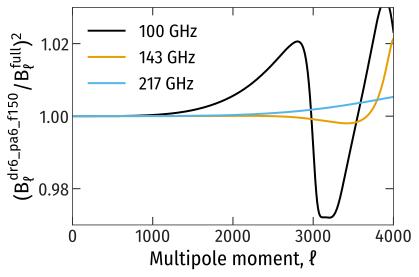

In [11]:
mask = "dr6_pa6_f150"
for freq in ("100", "143", "217"):
    fname = f"./out/QP_fullsky/Wl_npipe6v20_{freq}GHzx{freq}GHz.fits"
    hdul = fits.open(fname)
    Bl_TT_TT_fullsky = hdul[1].data['TT_2_TT'][0]

    fname = f"./out/QP_{mask}/Wl_npipe6v20_{freq}GHzx{freq}GHz.fits"
    hdul = fits.open(fname)
    Bl_TT_TT_pa4 = hdul[1].data['TT_2_TT'][0]
    
    plt.plot(Bl_TT_TT_pa4 / Bl_TT_TT_fullsky, "-", label=f"{freq} GHz")
    
plt.xlim(0,4000)
plt.ylim(1 - 0.03, 1 + 0.03)
plt.ylabel(r"$(B_{\ell}^{\rm"+mask.replace("_", "\_")+"} / B_{\ell}^{full})^2$")
plt.xlabel(r"Multipole moment, $\ell$")
plt.legend()
plt.tight_layout()
plt.savefig("figures/prelim_ACT_Planck_beam.png")